## Visual analysis of pictures 

Hanna Matera 


Write a Python script which does the following:

For each image, find the width, height, and number of channels
For each image, split image into four equal-sized quadrants (i.e. top-left, top-right, bottom-left, bottom-right)
Save each of the split images in JPG format
Create and save a file containing the filename, width, height for all of the new images.


Importing packages

In [56]:
import os
import numpy as np # creating an abbreviation to save keystrokes
import pandas as pd
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path

Installing opencv manually (as I ran into issues)

In [57]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.



Defining a data frame where the results go, specifying data path from which images are retrieved and a lits of images from the folder 

In [88]:
#data frame 
image_size_df = pd.DataFrame(columns = ['filename', 'height', 'width'])

#filepath 
data_path = os.path.join("data_cat","")



# define pandas with appropriate column names
Columns = ['filename','width','height']           
DATA = pd.DataFrame(columns = Columns)

# Create a list of all filenames in the image folder.
filelist = []
basepath = Path(data_path)
files_in_basepath = basepath.iterdir()
for item in files_in_basepath:
    if item.is_file():
        filelist.append(item.name)

Creating a function that splits up the image 

In [74]:
def image_split(hght1, hght2, wdth1, wdth2, image):
    new_image = image[hght1:hght2, wdth1:wdth2]

    return(new_image)


Creating a loop which slices images, saves them separately in a new folder and creates a data frame containing information about their properties (such as height, width and number of channels) 

In [97]:
for filename in filelist:
    
    # Create a specific image path and import&read the image
    img_path = os.path.join(data_path, filename)
    image = cv2.imread(img_path)
    
    # Assign respective properties of the image to variables 
    height, width, channels = img.shape
    
    # New heights and widths (N.B. int() is neccessary here)
    new_height = int(height/2)
    new_width = int(width/2)
    
    # Creating split images
    top_left = image_split(0,new_height,0,new_width,image)
    top_right = image_split(0,new_height,new_width, width,image)
    bottom_left = image_split(new_height,height,0, new_width,image)
    bottom_right = image_split(new_height,height,new_width, width,image)

    # collect the 4 image objects in a string
    new_images = [top_left, top_right,bottom_left, bottom_right]
    
    # Loop over each of the 4 split images generated from one image, save them, and put them into to the dataframe
    img_count = 1 
    
    for img in new_images:
    
        # Generate unique filename
        new_filename = filename[:-4] + "_slice" + str(img_count) + ".jpg"
    
        # save the split image
        outfile = os.path.join("new_images", new_filename) # joining filepath and new filename.
        cv2.imwrite(outfile, img)
    
        # Save to dataframe
        DATA = DATA.append({
            'filename': new_filename,
            'height': new_height,
            'width': new_width,
            }, ignore_index=True) 
    
        img_count = img_count + 1

# Save the dataframe as a csv file
DATA.to_csv("image_info.csv")

error: OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-qux1dpqc/opencv/modules/imgcodecs/src/loadsave.cpp:753: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


Reading an Image - defining jimshow 

In [83]:
def jimshow(image, title=False):
    """imshow with matplotlib dependencies 
    """
    # Acquire default dots per inch value of matplotlib
    dpi = mpl.rcParams['figure.dpi']

    height, width, depth = image.shape
    figsize = width / float(dpi), height / float(dpi)
    
    plt.figure(figsize=figsize)
    
    if depth == 1:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      
    if title:
        plt.title(title)
    plt.axis('off')
    
    plt.show()

#displaying an image 

In [99]:

# Save to dataframe

DATA = DATA.append({
'filename': new_filename,
'height': new_height,
'width': new_width,}, ignore_index=True) 

img_count = img_count + 1

# Save the dataframe as a csv file
DATA.to_csv("image_info.csv")

Defining height and width 

In [35]:
height = int(image.shape[0])
width = int(image.shape[1])

#new heights and widths 
new_height = int(image.shape[0]/2)
new_width = int(image.shape[1]/2)

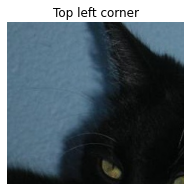

In [36]:
#top left corner 
top_left = image[0:new_height,0:new_width]

jimshow(top_left, "Top left corner")

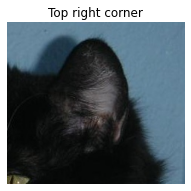

In [39]:
#top right corner 
top_right = image[0:new_height,new_width:width]

jimshow(top_right, "Top right corner")

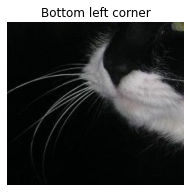

In [41]:
#bottom left corner 
bottom_left= image[new_height:height,0:new_width]

jimshow(bottom_left, "Bottom left corner")

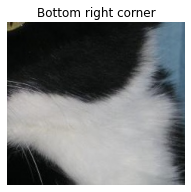

In [42]:
#bottom right corner 
bottom_right = image[new_height:height,new_width:width]

jimshow(bottom_right, "Bottom right corner")

Defining a function that extracts width, heigth and channels 

In [44]:
def width_height_channel(self, image):

        height, width, channels = image.shape[0], image.shape[1], image.shape[2]

        return height, width, channels

Opening all picture 

In [47]:
for filename in Path(data_path).glob("*.jpg"):
    
    

TypeError: width_height_channel() missing 1 required positional argument: 'image'

In [14]:
out_path = os.path.join("..", "Assignment1", "new_images", "new_image.png")

#saving a new image 

cv2.imwrite(out_path, image)

True